In [2]:
from astropy.io import fits
import numpy as np


In [3]:
PSF=fits.open('/Users/pdh21/astrodata/PSF/hsc-calibration/0x5000241aL_PSW_bgmod9_1arcsec.fits')

In [5]:
%matplotlib inline
import pylab as plt


In [6]:
PSF[1].data.shape

(2241, 2241)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


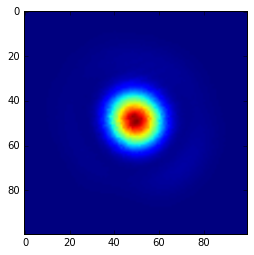

In [10]:
plt.imshow(PSF[1].data[(PSF[1].data.shape[0]+1)/2.0-50:(PSF[1].data.shape[0]+1)/2.0+50,(PSF[1].data.shape[0]+1)/2.0-50:(PSF[1].data.shape[0]+1)/2.0+50])

In [11]:
import GPy
from IPython.display import display

In [19]:
prf_y=PSF[1].data[(PSF[1].data.shape[0]-1)/2.0-50:(PSF[1].data.shape[0]-1)/2.0+51,(PSF[1].data.shape[0]-1)/2.0-50:(PSF[1].data.shape[0]-1)/2.0+51]

 /usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future


In [20]:
prf_y=prf_y.reshape(101**2,1)
pind250=np.arange(0,101,1)
X,Y=np.meshgrid(pind250,pind250)
prf_x=np.vstack((X.ravel(),Y.ravel())).T


 /usr/local/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


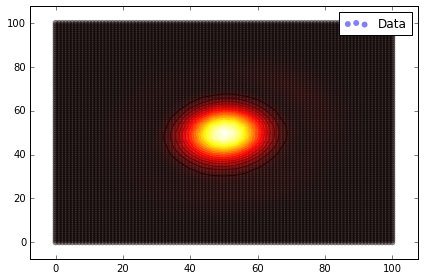

GP_regression.,value,constraints,priors
rbf.variance,0.0191862384954,+ve,
rbf.lengthscale,11.9973831715,+ve,
Gaussian_noise.variance,1.37259404095e-05,+ve,


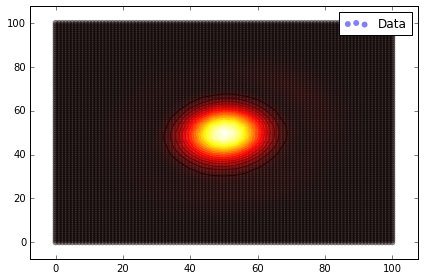

In [21]:
# define kernel
ker = GPy.kern.RBF(2,ARD=False)

# create simple GP model
m = GPy.models.GPRegression(prf_x,prf_y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)
fig = m.plot()
display(GPy.plotting.show(fig))
display(m)

In [26]:
pred_PSF=np.empty((101,101))
for i in range(0,101):
    for j in range(0,101):
        pred_PSF[i,j]=m.predict(np.array([i,j]).reshape(1,2))[0]


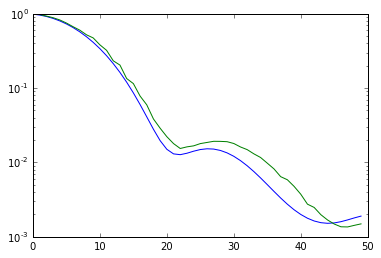

In [37]:
plt.plot(pred_PSF[51,51:])
plt.plot(prf_y.reshape(101,101)[51,51:])
